In [ ]:
!pip install ultralytics plotly networkx

import numpy as np
import pandas as pd
import plotly.express as px
import networkx as nx
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# Simulate sensor data
num_workers = 10
timesteps = 50

data = []
for t in range(timesteps):
    for w in range(num_workers):
        x = np.random.randint(0, 100)
        y = np.random.randint(0, 20)
        gas = np.random.normal(5, 2)
        vib = np.random.normal(0.5, 0.2)
        temp = np.random.normal(28, 2)
        data.append([t, w, x, y, gas, vib, temp])

df = pd.DataFrame(data, columns=['time', 'worker_id', 'x', 'y', 'gas', 'vibration', 'temp'])


In [ ]:
from sklearn.ensemble import IsolationForest

model_gas = IsolationForest(contamination=0.1)
model_vib = IsolationForest(contamination=0.1)

df['sensor_gas_anomaly'] = model_gas.fit_predict(df[['gas']]) == -1
df['sensor_vibration_anomaly'] = model_vib.fit_predict(df[['vibration']]) == -1


In [ ]:
# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load YOLOv8 model
model_yolo = YOLO('yolov8n.pt')

# Predict
results_list = model_yolo.predict(source=image_path)
results = results_list[0]

# Parse labels
class_map = model_yolo.names
detected_classes = results.boxes.cls.cpu().numpy()
detected_labels = [class_map[int(c)] for c in detected_classes]

cv_helmet_detected = 'person' in detected_labels  # Placeholder for helmet

print("Detected Labels:", detected_labels)
print("Helmet Detected:", cv_helmet_detected)


Saving StockCake-Tunnel Construction Worker_1748162629.jpg to StockCake-Tunnel Construction Worker_1748162629.jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 73.6MB/s]



image 1/1 /content/StockCake-Tunnel Construction Worker_1748162629.jpg: 640x384 1 person, 1 handbag, 343.9ms
Speed: 13.6ms preprocess, 343.9ms inference, 29.2ms postprocess per image at shape (1, 3, 640, 384)
Detected Labels: ['person', 'handbag']
Helmet Detected: True


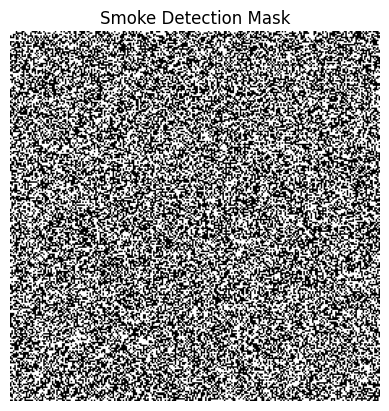

In [ ]:
# Simulate mask (replace with UNet output later)
mask = np.random.rand(256, 256)
binary_mask = (mask > 0.5).astype(int)
smoke_detected_flag = (binary_mask.sum() > 0)

plt.imshow(binary_mask, cmap='gray')
plt.title('Smoke Detection Mask')
plt.axis('off')
plt.show()


In [ ]:
def compute_risk(row):
    risk = 0
    if not cv_helmet_detected:
        risk += 1
    if row['sensor_gas_anomaly']:
        risk += 1
    if row['sensor_vibration_anomaly']:
        risk += 1
    if smoke_detected_flag:
        risk += 1
    return risk

df['risk_score'] = df.apply(compute_risk, axis=1)
df['risk_level'] = df['risk_score'].apply(lambda x: 'Safe' if x <= 1 else ('Moderate' if x == 2 else 'High'))

df.head()


,time,worker_id,x,y,gas,vibration,temp,sensor_gas_anomaly,sensor_vibration_anomaly,risk_score,risk_level
0,0,0,12,0,8.314493,0.247941,26.235076,False,False,1,Safe
1,0,1,67,13,4.753850,0.560852,27.163757,False,False,1,Safe
2,0,2,40,5,4.121834,0.437571,27.415210,False,False,1,Safe
3,0,3,16,11,4.925463,0.448222,30.566166,False,False,1,Safe
4,0,4,42,6,5.328266,0.553131,24.263132,False,False,1,Safe


In [ ]:
# Create grid graph
G = nx.grid_2d_graph(100, 20)
exits = [(0, y) for y in range(20)]  # Tunnel exits

def find_exit(x, y):
    return min(exits, key=lambda ex: abs(ex[0]-x)+abs(ex[1]-y))

# Compute evacuation path lengths for latest time step
df_latest = df[df['time'] == df['time'].max()].copy()
df_latest['evacuation_path_length'] = df_latest.apply(
    lambda row: len(nx.shortest_path(G, (row['x'], row['y']), find_exit(row['x'], row['y']))),
    axis=1
)

df_latest[['worker_id', 'x', 'y', 'risk_level', 'evacuation_path_length']]


,worker_id,x,y,risk_level,evacuation_path_length
490,0,68,13,Safe,69
491,1,31,9,Moderate,32
492,2,23,3,Safe,24
493,3,18,7,Safe,19
494,4,93,13,Safe,94
495,5,56,8,Safe,57
496,6,38,16,Safe,39
497,7,92,17,Safe,93
498,8,79,19,Safe,80
499,9,75,12,Safe,76


In [ ]:
summary = {
    'Total Workers': df['worker_id'].nunique(),
    'Evacuation Needed': df[df['risk_level'] == 'High'].shape[0],
    'PPE Violations': df[df['risk_level'] == 'High'].shape[0],
    'Gas Anomalies': df[df['sensor_gas_anomaly'] == True].shape[0],
    'Vibration Anomalies': df[df['sensor_vibration_anomaly'] == True].shape[0],
    'Smoke Detected': int(smoke_detected_flag)
}

pd.DataFrame.from_dict(summary, orient='index', columns=['Count'])


,Count
Total Workers,10
Evacuation Needed,3
PPE Violations,3
Gas Anomalies,50
Vibration Anomalies,50
Smoke Detected,1


In [ ]:
fig = px.scatter_3d(df, x='x', y='y', z='time', color='risk_level',
                    hover_data=['worker_id', 'risk_score'],
                    title='Tunnel Worker Risk Levels')

fig.show()
